In [2]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/pyplot-perso")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [4]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])

In [5]:
log = lammps_logfile.File("initial.log")
Step_EM = log.get("Step", run_num = 0)
PotEng_EM = log.get("TotEng", run_num = 0) # PotEn = TotEn the same if KinEn = 0
KinEng_EM = log.get("TotEng", run_num = 0)*0 # KinEn = 0
# During MD
timestep = 0.005
Step_MD = log.get("Step", run_num = 1)
Time_MD = Step_MD*timestep # time unit
PotEng_MD = log.get("PotEng", run_num = 1)
KinEng_MD = log.get("KinEng", run_num = 1)

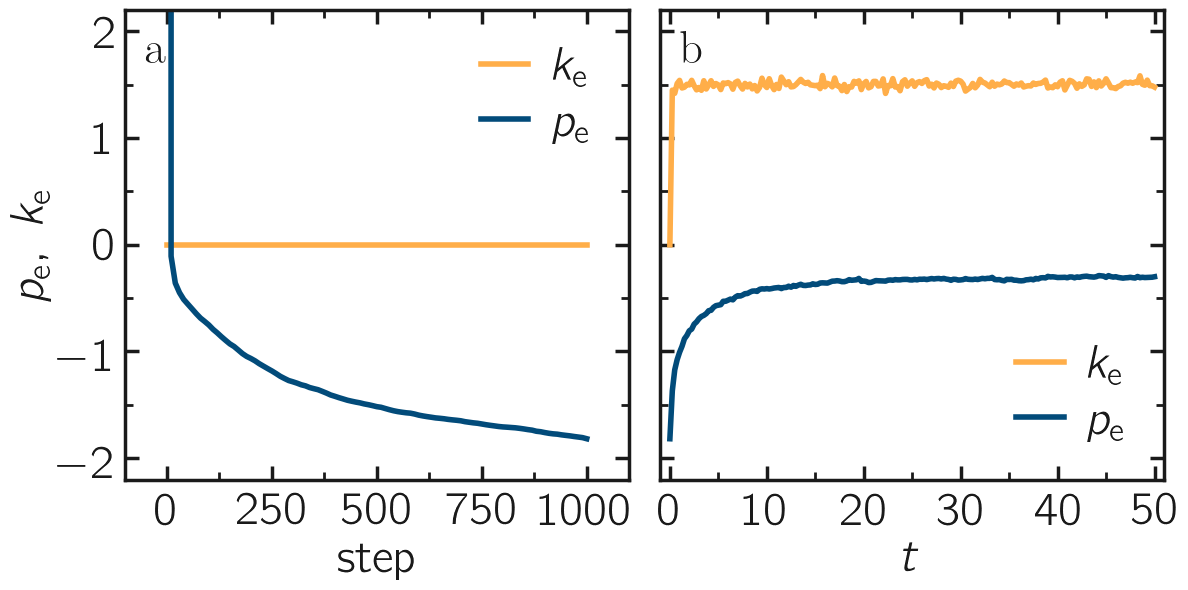

In [8]:
filename = "LJ-energy"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,6), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = Step_EM, y = KinEng_EM, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12, data_label = r'$k_\mathrm{e}$')
myplt.add_plot(x = Step_EM, y = PotEng_EM, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12, data_label = r'$p_\mathrm{e}$')
myplt.complete_panel(ylabel = r'$p_\mathrm{e}, ~ k_\mathrm{e}$', xlabel = r'$\mathrm{step}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1001, 250), x_boundaries=(-100, 1100.5),
                     y_ticks=np.arange(-2, 2.01, 1), y_boundaries=(-2.2, 2.2))
# Panel b
myplt.add_panel()
#myplt.add_plot(x = Time_MD-Time_MD[0], y = PotEng_MD+KinEng_MD, type = "plot", linewidth_data = 3,
#               marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12, data_label = r'$e_\mathrm{total}$')
myplt.add_plot(x = Time_MD-Time_MD[0], y = KinEng_MD, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12, data_label = r'$k_\mathrm{e}$')
myplt.add_plot(x = Time_MD-Time_MD[0], y = PotEng_MD, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12, data_label = r'$p_\mathrm{e}$')
myplt.complete_panel(ylabel = None, xlabel = r'$t$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 51, 10), x_boundaries=(-1, 51),)
                     #y_ticks=np.arange(-2, 2, 0.5), y_boundaries=(-2, 2))
# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)

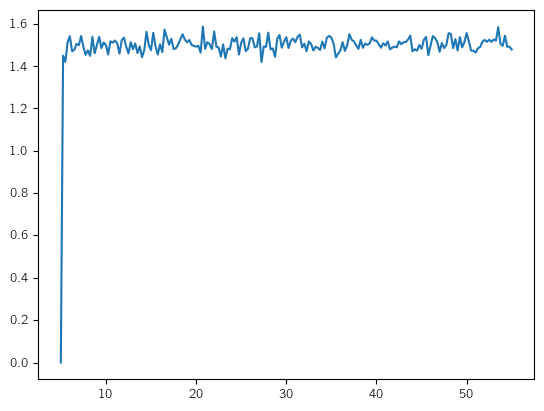

In [33]:

import matplotlib.pyplot as plt
plt.plot(Time_MD, KinEng_MD)